<a href="https://colab.research.google.com/github/meglee67/datasci_7_geospatial/blob/main/HHA_507_HW_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load in packages

In [61]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# **1. Acquire Geospatial Data**
* I ended up doing 2 datasets because the first dataset I worked with (the Census.csv) gave me a weird map, but I didn't want to throw it away.
* [2019 Census US Population Data By State](https://www.kaggle.com/datasets/peretzcohen/2019-census-us-population-data-by-state) dataset is from kaggle and I renamed the file to Census.csv
* [Illinois Obesity By County](https://catalog.data.gov/dataset/illinois-obesity-by-county-c40b7) is taken from data.gov



# **2. Geospatial Data Processing**

## Load in dataset

In [24]:
df = pd.read_csv('Census.csv')
df

,STATE,POPESTIMATE2019,lat,long
0,Alabama,4903185,32.377716,-86.300568
1,Alaska,731545,58.301598,-134.420212
2,Arizona,7278717,33.448143,-112.096962
3,Arkansas,3017804,34.746613,-92.288986
4,California,39512223,38.576668,-121.493629
5,Colorado,5758736,39.739227,-104.984856
6,Connecticut,3565287,41.764046,-72.682198
7,Delaware,973764,39.157307,-75.519722
8,District of Columbia,705749,38.895110,-77.036370
9,Florida,21477737,30.438118,-84.281296


In [47]:
# I tried to do a normal pd.read_json but it gave me the error "Mixing dicts with non-Series may lead to ambiguous ordering." so I just used gpd.read_file
df_obesity = gpd.read_file('Illinois_Obesity_By_County.geojson')
df_obesity

,FID,County,Percent_1,SHAPE_Length,SHAPE_Area,geometry
0,1,McHenry County,27.7,1.694755,0.172780,"MULTIPOLYGON (((-88.70742 42.49352, -88.68809 ..."
1,2,Boone County,33.7,1.149940,0.079779,"MULTIPOLYGON (((-88.70742 42.49352, -88.70741 ..."
2,3,Ogle County,31.2,2.172106,0.214994,"MULTIPOLYGON (((-89.68809 42.19950, -89.66847 ..."
3,4,Will County,28.0,2.496727,0.236935,"MULTIPOLYGON (((-88.26146 41.72439, -88.26147 ..."
4,5,LaSalle County,27.1,2.546369,0.319911,"MULTIPOLYGON (((-88.93885 41.62837, -88.93871 ..."
...,...,...,...,...,...,...
97,98,Jefferson County,30.2,1.589936,0.155731,"MULTIPOLYGON (((-89.14445 38.47387, -89.12638 ..."
98,99,Lawrence County,28.9,1.407248,0.100337,"MULTIPOLYGON (((-87.90806 38.85013, -87.88945 ..."
99,100,Marion County,33.5,1.590822,0.154362,"MULTIPOLYGON (((-89.13844 38.73633, -89.13828 ..."
100,101,Union County,28.2,1.553931,0.111360,"MULTIPOLYGON (((-89.04143 37.59650, -89.04143 ..."


## Inspecting Shape

## Census

In [48]:
# Check the size and shape of df_goodsam
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 51
Number of columns: 4


In [26]:
# Check using the size function
print("Using size: ", df.size)

Using size:  204


In [27]:
df.dtypes

STATE               object
POPESTIMATE2019      int64
lat                float64
long               float64
dtype: object

## Illinois Obesity

In [49]:
# Check the size and shape of df_goodsam
print("Number of rows:", df_obesity.shape[0])
print("Number of columns:", df_obesity.shape[1])

Number of rows: 102
Number of columns: 6


In [50]:
# Check using the size function
print("Using size: ", df_obesity.size)

Using size:  612


In [51]:
df_obesity.dtypes

FID                int64
County            object
Percent_1        float64
SHAPE_Length     float64
SHAPE_Area       float64
geometry        geometry
dtype: object

## Checking for missing values and dealing with duplicate columns or rows

## Census

In [28]:
# df values
df.isnull().values.sum()

0

In [55]:
# Identify and remove duplicate rows and columns
df = df.drop_duplicates()
df

,STATE,POPESTIMATE2019,lat,long
0,Alabama,4903185,32.377716,-86.300568
1,Alaska,731545,58.301598,-134.420212
2,Arizona,7278717,33.448143,-112.096962
3,Arkansas,3017804,34.746613,-92.288986
4,California,39512223,38.576668,-121.493629
5,Colorado,5758736,39.739227,-104.984856
6,Connecticut,3565287,41.764046,-72.682198
7,Delaware,973764,39.157307,-75.519722
8,District of Columbia,705749,38.895110,-77.036370
9,Florida,21477737,30.438118,-84.281296


## Illinois Obesity


In [52]:
# df values
df_obesity.isnull().values.sum()

0

In [54]:
# Identify and remove duplicate rows and columns
df_obesity = df_obesity.drop_duplicates()
df_obesity

,FID,County,Percent_1,SHAPE_Length,SHAPE_Area,geometry
0,1,McHenry County,27.7,1.694755,0.172780,"MULTIPOLYGON (((-88.70742 42.49352, -88.68809 ..."
1,2,Boone County,33.7,1.149940,0.079779,"MULTIPOLYGON (((-88.70742 42.49352, -88.70741 ..."
2,3,Ogle County,31.2,2.172106,0.214994,"MULTIPOLYGON (((-89.68809 42.19950, -89.66847 ..."
3,4,Will County,28.0,2.496727,0.236935,"MULTIPOLYGON (((-88.26146 41.72439, -88.26147 ..."
4,5,LaSalle County,27.1,2.546369,0.319911,"MULTIPOLYGON (((-88.93885 41.62837, -88.93871 ..."
...,...,...,...,...,...,...
97,98,Jefferson County,30.2,1.589936,0.155731,"MULTIPOLYGON (((-89.14445 38.47387, -89.12638 ..."
98,99,Lawrence County,28.9,1.407248,0.100337,"MULTIPOLYGON (((-87.90806 38.85013, -87.88945 ..."
99,100,Marion County,33.5,1.590822,0.154362,"MULTIPOLYGON (((-89.13844 38.73633, -89.13828 ..."
100,101,Union County,28.2,1.553931,0.111360,"MULTIPOLYGON (((-89.04143 37.59650, -89.04143 ..."


### There are no duplicate rows or columns and no missing values for either dataset.

# **3. Static Mapping**

## Census

In [30]:
df_gpd = gpd.read_file('Census.csv')
df_gpd

,STATE,POPESTIMATE2019,lat,long,geometry
0,Alabama,4903185,32.377716,-86.300568,None
1,Alaska,731545,58.301598,-134.420212,None
2,Arizona,7278717,33.448143,-112.096962,None
3,Arkansas,3017804,34.746613,-92.288986,None
4,California,39512223,38.576668,-121.493629,None
5,Colorado,5758736,39.739227,-104.984856,None
6,Connecticut,3565287,41.764046,-72.682198,None
7,Delaware,973764,39.157307,-75.519722,None
8,District of Columbia,705749,38.89511,-77.03637,None
9,Florida,21477737,30.438118,-84.281296,None


In [59]:
# Read your data from the CSV file using pandas
df = pd.read_csv('Census.csv')

# Convert the DataFrame to a GeoDataFrame
# Replace 'lat' and 'long' with the corresponding column names in your CSV
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.long, df.lat))

In [35]:
# Display selected columns sorted by 'POPESTIMATE2019'
print(gdf[['POPESTIMATE2019', 'lat', 'long']].sort_values(by=['POPESTIMATE2019'], ascending=False))

    POPESTIMATE2019        lat        long
4         39512.223  38.576668 -121.493629
43        28995.881  30.274670  -97.740349
9         21477.737  30.438118  -84.281296
32        19453.561  42.652843  -73.757874
38        12801.989  40.264378  -76.883598
13        12671.821  39.798363  -89.654961
35        11689.100  39.961346  -82.999069
10        10617.423  33.749027  -84.388229
33        10488.084  35.780430  -78.639099
22         9986.857  42.733635  -84.555328
30         8882.190  40.220596  -74.769913
46         8535.519  37.538857  -77.433640
47         7614.893  47.035805 -122.905014
2          7278.717  33.448143 -112.096962
21         6892.503  42.358162  -71.063698
42         6829.174  36.165810  -86.784241
14         6732.219  39.768623  -86.162643
25         6137.428  38.579201  -92.172935
20         6045.680  38.978764  -76.490936
49         5822.434  43.074684  -89.384445
5          5758.736  39.739227 -104.984856
23         5639.632  44.955097  -93.102211
40         

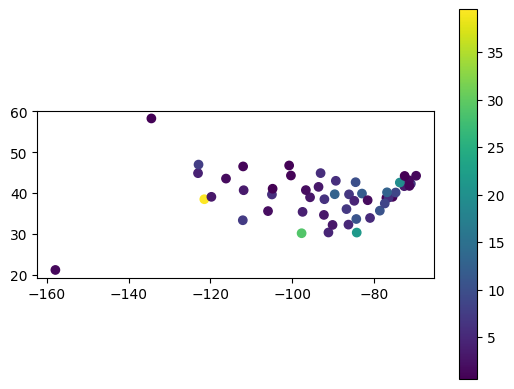

In [36]:
# Divide 'POPESTIMATE2019' by 1000 (for example)
# Replace 'POPESTIMATE2019' with the appropriate column in your CSV file
gdf['POPESTIMATE2019'] = (gdf['POPESTIMATE2019'] / 1000)

# Plot the 'POPESTIMATE2019' column (assuming it represents numeric data)
gdf.plot(column='POPESTIMATE2019', legend=True)
plt.show()

**This dataset depicts the census data by state and shows the population estimate in 2019 by state. I used the longitude and lattitude, but the map came out kinda weird.**

## Illinois Obesity by County

In [41]:
df_gpd = gpd.read_file('Illinois_Obesity_By_County.geojson')
df_gpd

,FID,County,Percent_1,SHAPE_Length,SHAPE_Area,geometry
0,1,McHenry County,27.7,1.694755,0.172780,"MULTIPOLYGON (((-88.70742 42.49352, -88.68809 ..."
1,2,Boone County,33.7,1.149940,0.079779,"MULTIPOLYGON (((-88.70742 42.49352, -88.70741 ..."
2,3,Ogle County,31.2,2.172106,0.214994,"MULTIPOLYGON (((-89.68809 42.19950, -89.66847 ..."
3,4,Will County,28.0,2.496727,0.236935,"MULTIPOLYGON (((-88.26146 41.72439, -88.26147 ..."
4,5,LaSalle County,27.1,2.546369,0.319911,"MULTIPOLYGON (((-88.93885 41.62837, -88.93871 ..."
...,...,...,...,...,...,...
97,98,Jefferson County,30.2,1.589936,0.155731,"MULTIPOLYGON (((-89.14445 38.47387, -89.12638 ..."
98,99,Lawrence County,28.9,1.407248,0.100337,"MULTIPOLYGON (((-87.90806 38.85013, -87.88945 ..."
99,100,Marion County,33.5,1.590822,0.154362,"MULTIPOLYGON (((-89.13844 38.73633, -89.13828 ..."
100,101,Union County,28.2,1.553931,0.111360,"MULTIPOLYGON (((-89.04143 37.59650, -89.04143 ..."


<Axes: >

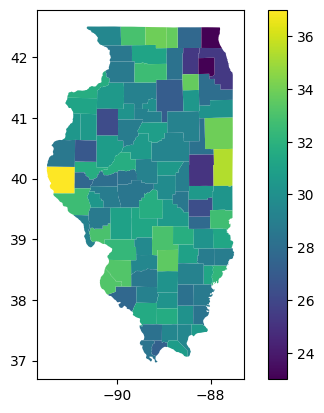

In [58]:
df_gpd.plot("Percent_1", legend=True)


**This dataset depicts the obesity by county in Illinois (what percentage of each county is considered obese). This visualization shows by color each county and the percentage of its population considered to be obsese.**